In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\Om\AppData\Local\Temp\ipykernel_15004\2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [7]:
df['Age'].isnull().sum()

np.int64(0)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.shape

(712, 2)

C:\Users\Om\AppData\Local\Temp\ipykernel_15004\2260591548.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


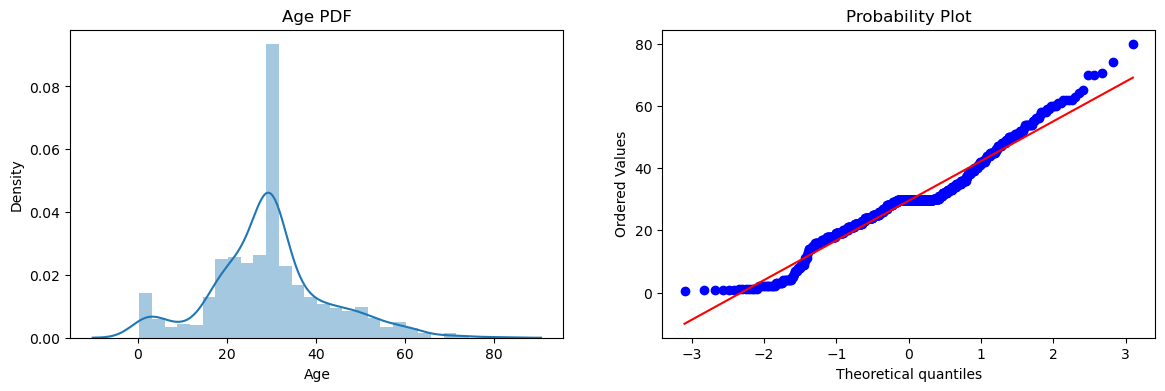

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist= 'norm', plot = plt)
plt.show()

C:\Users\Om\AppData\Local\Temp\ipykernel_15004\173012952.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


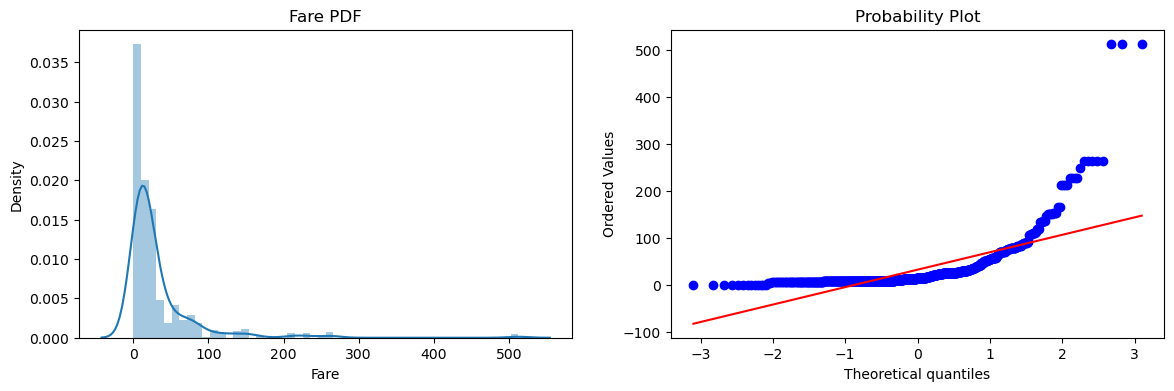

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist= 'norm', plot = plt)
plt.show()

In [15]:
lr = LogisticRegression()
clf =  DecisionTreeClassifier()

In [16]:
lr.fit(X_train, y_train)
clf.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred1 = clf.predict(X_test)

print("Accuracy Score of LR", accuracy_score(y_pred, y_test))
print("Accuracy Score of CLF", accuracy_score(y_pred1, y_test))

Accuracy Score of LR 0.6480446927374302
Accuracy Score of CLF 0.664804469273743


In [17]:
trf = FunctionTransformer(func = np.log1p)

In [20]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [19]:
lr1 = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [22]:
lr1.fit(X_train_transform, y_train)
clf1.fit(X_train_transform, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = lr1.predict(X_test)
y_pred1 = clf1.predict(X_test)

In [25]:
print("Accuracy Score of LR", accuracy_score(y_pred, y_test))
print("Accuracy Score of CLF", accuracy_score(y_pred1, y_test))

Accuracy Score of LR 0.7374301675977654
Accuracy Score of CLF 0.5865921787709497


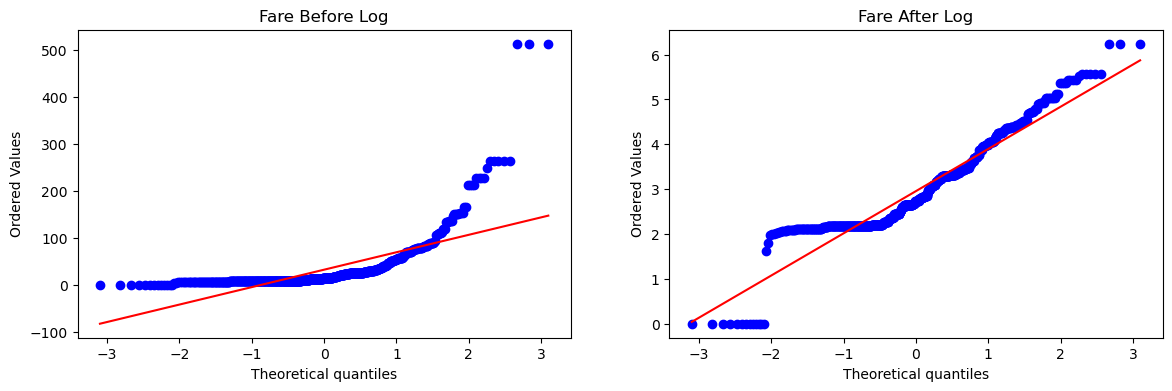

In [27]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

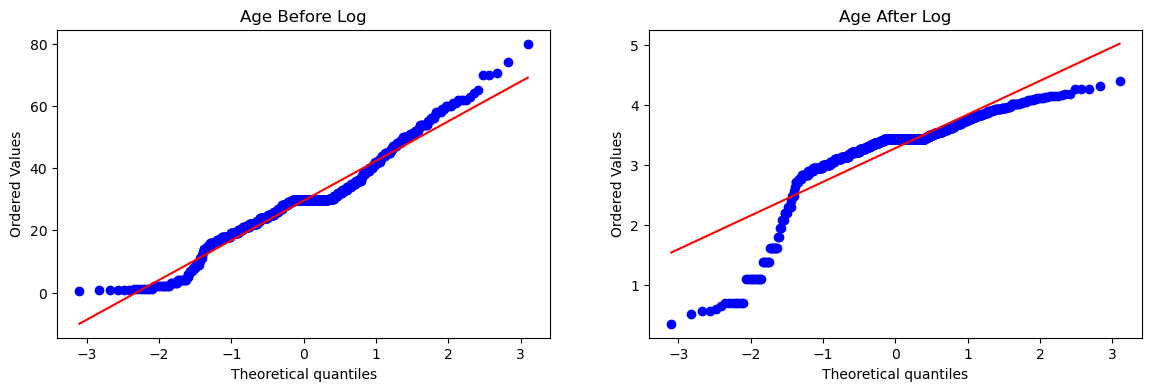

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [29]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p), ['Fare'])],remainder='passthrough')

In [31]:
X_train_transform1 = trf2.fit_transform(X_train)
X_test_transform1 = trf2.transform(X_test)

In [34]:
lr2 = LogisticRegression()
clf2 = DecisionTreeClassifier()

lr2.fit(X_train_transform1, y_train)
clf2.fit(X_train_transform1, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = lr2.predict(X_test_transform1)
y_pred1 = clf2.predict(X_test_transform1)

print("Accuracy Score of LR", accuracy_score(y_pred, y_test))
print("Accuracy Score of CLF", accuracy_score(y_pred1, y_test))

Accuracy Score of LR 0.6703910614525139
Accuracy Score of CLF 0.664804469273743


In [37]:
def apply_transform(transform):
    X = df.iloc[ : , 1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform), ['Fare'])], remainder='passthrough' )

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fate after transform')

    plt.show()

## Power Transformation

Accuracy 0.6431335830212235


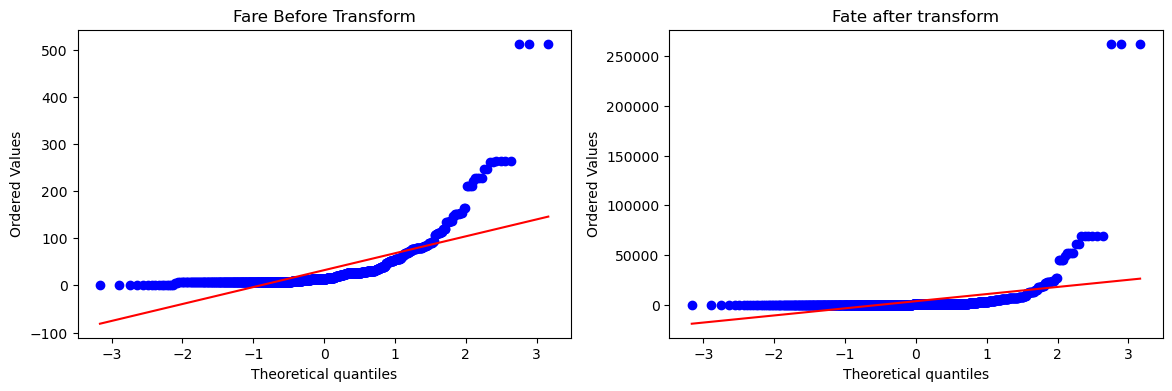

In [39]:
apply_transform(lambda x: x**2)

## Reciprocal Transformation

Accuracy 0.61729088639201


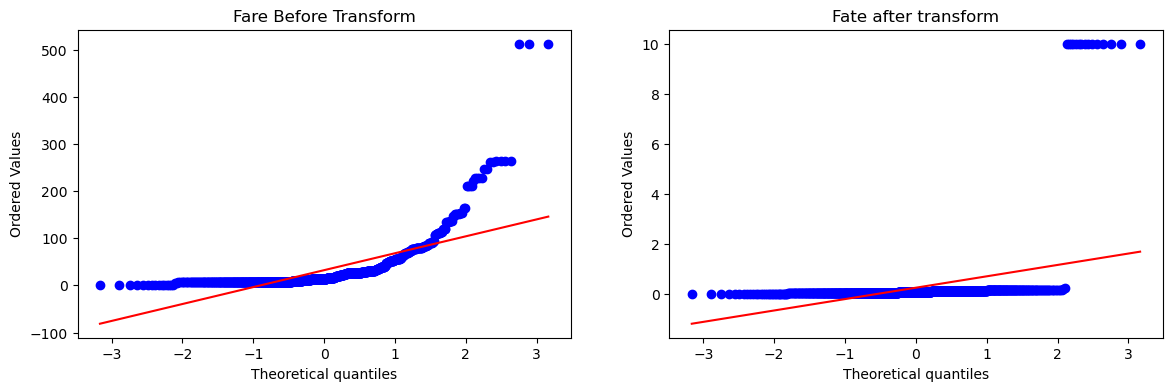

In [41]:
apply_transform(lambda x: 1/(x + 0.1))